# 网格搜索

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

sk_knn_clf = KNeighborsClassifier(n_neighbors=4, weights='uniform')
sk_knn_clf.fit(X_train, y_train)
sk_knn_clf.score(X_test, y_test)

0.9916666666666667

## Grid Search

In [3]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': range(1, 11),
    },
    {
        'weights': ['distance'],
        'n_neighbors': range(1, 11),
        'p': range(1, 6),
    },
]

In [4]:
knn_clf = KNeighborsClassifier()

In [5]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid)

In [6]:
%%time
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 2min 2s, sys: 882 ms, total: 2min 3s
Wall time: 2min 5s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': range(1, 11)}, {'weights': ['distance'], 'n_neighbors': range(1, 11), 'p': range(1, 6)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [7]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance')

In [8]:
grid_search.best_score_

0.9853862212943633

In [9]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [10]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test, y_test)

0.9833333333333333

In [12]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min


CPU times: user 438 ms, sys: 41.8 ms, total: 479 ms
Wall time: 1min 11s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.2min finished


# 更多的距离定义

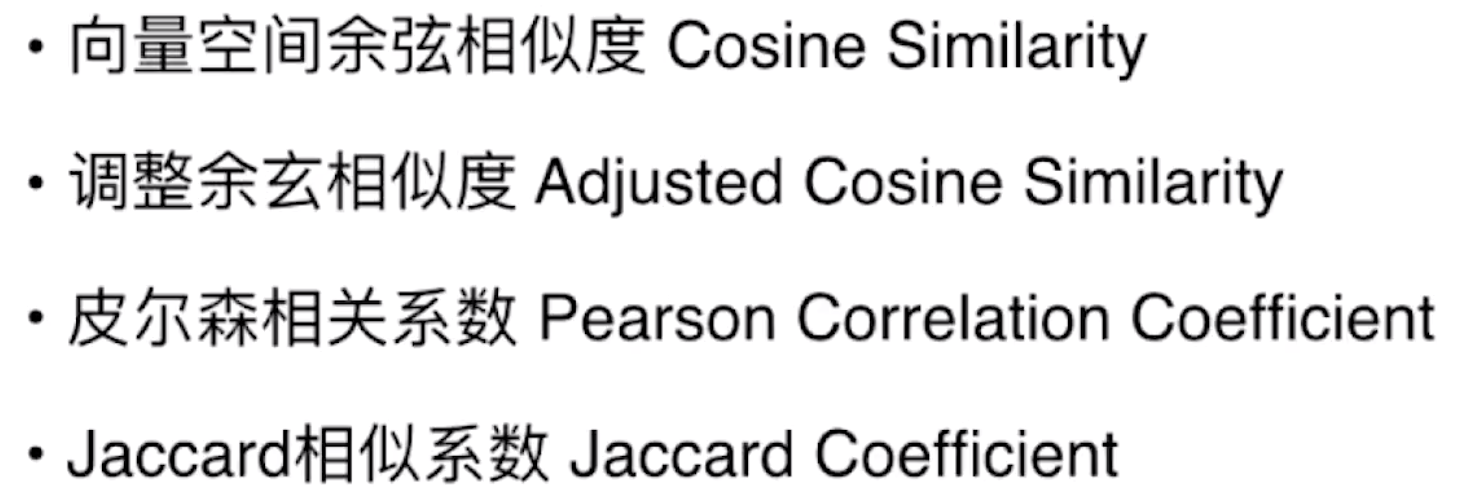